In [1]:
import numpy as np
from keras.applications.vgg16 import VGG16
import keras
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt

%matplotlib inline

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1060 6GB (CNMeM is disabled, cuDNN 5110)


In [2]:
data = np.load("./data.npy")
labels = np.load("./labels.npy")

print data.shape
print labels.shape

(12500L, 224L, 224L, 3L)
(12500L,)


In [3]:
labels = to_categorical(labels)
print labels.shape

(12500L, 2L)


In [4]:
split = int(0.80 * data.shape[0])
x_train = data[:split, :, :, :]
x_test = data[split:, :, :, :]

y_train = labels[:split]
y_test = labels[split:]

print x_train.shape, y_train.shape
print x_test.shape, y_test.shape

(10000L, 224L, 224L, 3L) (10000L, 2L)
(2500L, 224L, 224L, 3L) (2500L, 2L)


In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

adam = Adam(lr=0.0003)
model.load_weights("./training_model.h5")
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 51, 51, 128)       73856     
__________

In [6]:
hist = model.fit(x_train, y_train, shuffle=True, batch_size=64, epochs=15, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 2500 samples
Epoch 1/15
10000/10000 [==============================] - 273s - loss: 0.6288 - acc: 0.6549 - val_loss: 0.6851 - val_acc: 0.5348
Epoch 2/15
10000/10000 [==============================] - 275s - loss: 0.5465 - acc: 0.7245 - val_loss: 0.6131 - val_acc: 0.6532
Epoch 3/15
10000/10000 [==============================] - 281s - loss: 0.5012 - acc: 0.7533 - val_loss: 0.6955 - val_acc: 0.5896
Epoch 4/15
10000/10000 [==============================] - 271s - loss: 0.4469 - acc: 0.7883 - val_loss: 0.5976 - val_acc: 0.6904
Epoch 5/15
10000/10000 [==============================] - 271s - loss: 0.3881 - acc: 0.8211 - val_loss: 0.8444 - val_acc: 0.5832
Epoch 6/15
10000/10000 [==============================] - 271s - loss: 0.3225 - acc: 0.8585 - val_loss: 0.6571 - val_acc: 0.6872
Epoch 7/15
10000/10000 [==============================] - 271s - loss: 0.2495 - acc: 0.8964 - val_loss: 0.5283 - val_acc: 0.7976
Epoch 8/15
10000/10000 [========================

In [7]:
model.save_weights("./training_model.h5")

In [7]:
model.layers

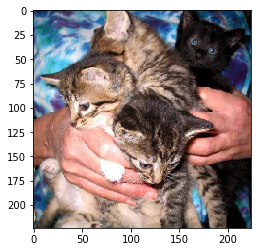

In [15]:
plt.figure(0)
plt.imshow(x_train[500])
plt.show()

In [8]:
first_block = Model(inputs=model.input, outputs=model.layers[1].output)
first_block.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7_input (InputLayer)  (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 32)      9248      
Total params: 10,144.0
Trainable params: 10,144.0
Non-trainable params: 0.0
_________________________________________________________________


In [9]:
out = first_block.predict(x_train[500, :, :, :].reshape((-1, 224, 224, 3)))
print out.shape

plt.figure(figsize=(220,220))
for ix in range(out.shape[3]):
    plt.subplot(4, 8, ix+1)
    plt.axis('off')
    plt.imshow(out[:, :, :, ix].reshape((220, 220)))
plt.show()

(1L, 220L, 220L, 32L)


In [10]:
second_block = Model(inputs=model.input, outputs=model.layers[4].output)
second_block.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7_input (InputLayer)  (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 106, 106, 64)      36928     
Total params: 65,568.0
Trainable params: 65,568.0
Non-trainable params: 0.0
_________________________________________________________________


In [11]:
out = second_block.predict(x_train[500, :, :, :].reshape((-1, 224, 224, 3)))
print out.shape

plt.figure(figsize=(220,220))
for ix in range(out.shape[3]):
    plt.subplot(8, 8, ix+1)
    plt.axis('off')
    plt.imshow(out[:, :, :, ix].reshape((106, 106)))
plt.show()

(1L, 106L, 106L, 64L)


In [12]:
third_block = Model(inputs=model.input, outputs=model.layers[7].output)
third_block.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7_input (InputLayer)  (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 64)        0         
__________

In [13]:
out = third_block.predict(x_train[500, :, :, :].reshape((-1, 224, 224, 3)))
print out.shape

plt.figure(figsize=(220,220))
for ix in range(out.shape[3]/2):
    plt.subplot(8, 8, ix+1)
    plt.axis('off')
    plt.imshow(out[:, :, :, ix].reshape((49, 49)))
plt.show()

(1L, 49L, 49L, 128L)
